In [1]:
import pandas as pd

df = pd.read_excel('Top_5_Compounds_Tanimoto_Similarity.xlsx')
df

,canonical_smiles,pIC50,Structure,tanimoto_values
0,COC1=C2C[C@@H](C)C[C@H](OC)[C@H](O)[C@@H](C)/C...,6.698970,<rdkit.Chem.rdchem.Mol object at 0x7b825caa8580>,1.000000
1,CO[C@H]1/C=C\C=C(/C)C(=O)NC2=CC(=O)C(c3ccccc3)...,6.552842,<rdkit.Chem.rdchem.Mol object at 0x7b825ca6ba70>,0.790123
2,CCOC(=O)NC1=C2C[C@@H](C)C[C@H](OC)[C@H](O)[C@@...,6.585027,<rdkit.Chem.rdchem.Mol object at 0x7b825ca6bbc0>,0.761905
3,CO[C@H]1/C=C\C=C(/C)C(=O)NC2=CC(=O)C(NCCN(C)C)...,7.754487,<rdkit.Chem.rdchem.Mol object at 0x7b825caadd90>,0.761905
4,C=CCNC1=C2C[C@@H](C)C[C@H](OC)[C@H](O)[C@@H](C...,4.872895,<rdkit.Chem.rdchem.Mol object at 0x7b825ca6b8b0>,0.752941


In [2]:
pip install pubchempy

In [3]:
import pandas as pd
import pubchempy as pcp

# Fungsi untuk mencari nama senyawa berdasarkan SMILES
def get_compound_name(smiles):
    try:
        compound = pcp.get_compounds(smiles, 'smiles')
        if compound and compound[0].iupac_name:
            return compound[0].iupac_name
        else:
            return "Name not found"
    except Exception as e:
        return f"Error: {e}"

# Menambahkan kolom nama senyawa ke DataFrame
df['compound_name'] = df['canonical_smiles'].apply(get_compound_name)

# Membuat DataFrame dengan kolom 'canonical_smiles' dan 'compound_name'
compound_name_df = df[['canonical_smiles', 'compound_name']]

# Menampilkan DataFrame
compound_name_df

,canonical_smiles,compound_name
0,COC1=C2C[C@@H](C)C[C@H](OC)[C@H](O)[C@@H](C)/C...,"[(4E,6Z,8S,9S,10E,12S,13R,14S,16R)-13-hydroxy-..."
1,CO[C@H]1/C=C\C=C(/C)C(=O)NC2=CC(=O)C(c3ccccc3)...,"[(4E,6Z,8S,9S,10E,12S,13R,14S,16R)-13-hydroxy-..."
2,CCOC(=O)NC1=C2C[C@@H](C)C[C@H](OC)[C@H](O)[C@@...,"ethyl N-[(4E,6Z,8S,9S,10E,12S,13R,14S,16R)-9-c..."
3,CO[C@H]1/C=C\C=C(/C)C(=O)NC2=CC(=O)C(NCCN(C)C)...,"[(4E,6Z,8S,9S,10E,12S,13R,14S,16R)-19-[2-(dime..."
4,C=CCNC1=C2C[C@@H](C)C[C@H](OC)[C@H](O)[C@@H](C...,"[(4E,6Z,8S,9S,10E,12S,13R,14S,16R)-13-hydroxy-..."


In [4]:
import pubchempy as pcp

# Fungsi untuk mencari nama singkat senyawa berdasarkan SMILES
def get_short_name(smiles):
    try:
        compound = pcp.get_compounds(smiles, 'smiles')
        if compound and compound[0].synonyms:
            return compound[0].synonyms[0]  # Mengambil nama pertama dari daftar sinonim
        else:
            return "Short name not found"
    except Exception as e:
        return f"Error: {e}"

# Menambahkan kolom nama singkat ke DataFrame
df['short_name'] = df['canonical_smiles'].apply(get_short_name)

# Membuat DataFrame baru dengan kolom 'canonical_smiles' dan 'short_name'
short_name_df = df[['canonical_smiles', 'short_name']]

# Menampilkan DataFrame
short_name_df

,canonical_smiles,short_name
0,COC1=C2C[C@@H](C)C[C@H](OC)[C@H](O)[C@@H](C)/C...,geldanamycin
1,CO[C@H]1/C=C\C=C(/C)C(=O)NC2=CC(=O)C(c3ccccc3)...,SCHEMBL13999647
2,CCOC(=O)NC1=C2C[C@@H](C)C[C@H](OC)[C@H](O)[C@@...,SCHEMBL13999651
3,CO[C@H]1/C=C\C=C(/C)C(=O)NC2=CC(=O)C(NCCN(C)C)...,alvespimycin
4,C=CCNC1=C2C[C@@H](C)C[C@H](OC)[C@H](O)[C@@H](C...,Tanespimycin


In [5]:
!pip install rdkit-pypi

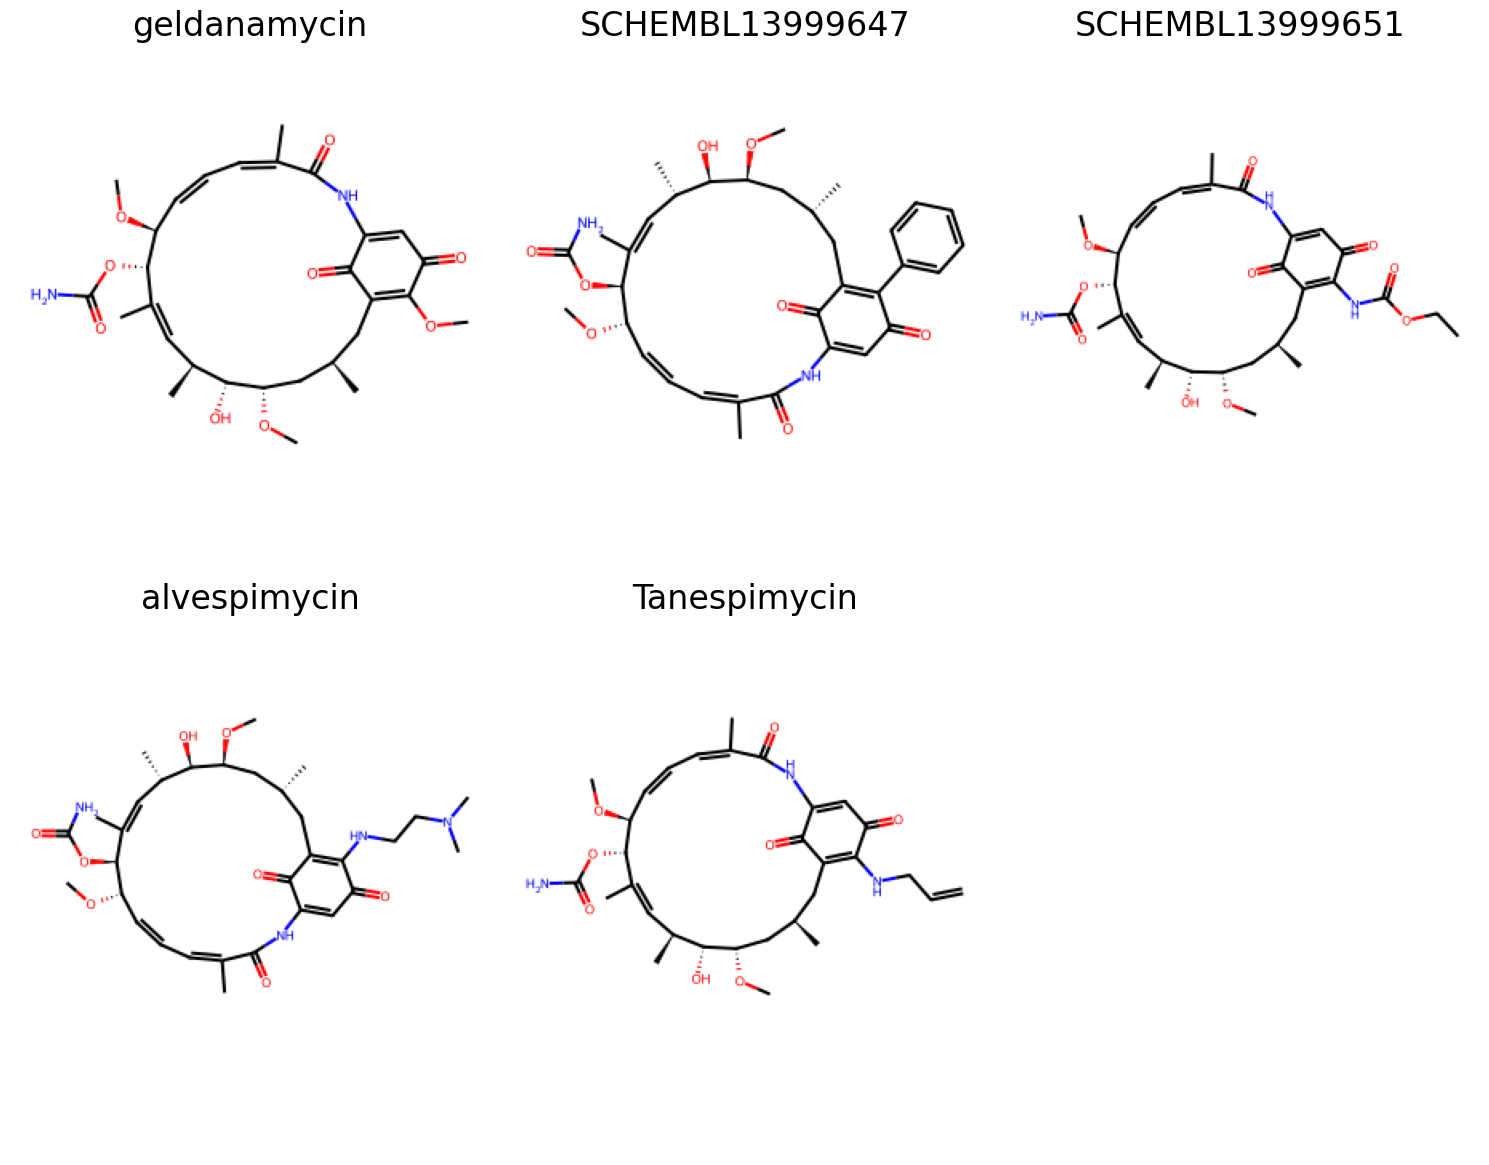

In [7]:
from rdkit.Chem import Draw
from rdkit import Chem
import matplotlib.pyplot as plt
import math

# Membuat daftar Molekul RDKit dan nama singkat
mols = [Chem.MolFromSmiles(smiles) for smiles in df['canonical_smiles']]
names = df['short_name'].tolist()

# Tentukan ukuran grid
cols = 3
rows = math.ceil(len(mols) / cols)

# Membuat subplot grid
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 6))  # Perbesar ukuran gambar

# Pastikan axes berbentuk 2D array untuk iterasi
axes = axes.flatten()

# Visualisasi molekul
for i, (mol, name) in enumerate(zip(mols, names)):
    if mol:  # Pastikan molekul valid
        img = Draw.MolToImage(mol, size=(300, 300))  # Ukuran gambar molekul
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(name, fontsize=24, wrap=True)  # Fontsize diperbesar
    else:
        axes[i].text(0.5, 0.5, "Invalid Molecule", horizontalalignment='center', verticalalignment='center', fontsize=16)
        axes[i].axis('off')

# Jika ada subplot kosong, sembunyikan
for j in range(len(mols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()
